# Тестирование и профилирование

Структура занятия:

1) пирамида тестирования

2) doctest

3) unittest

4) pytest

5) профилирование

6) cProfile

Цель тестирования — проверка соответствия ПО предъявляемым требованиям, обеспечение уверенности в качестве ПО, поиск очевидных ошибок в программном обеспечении, которые должны быть выявлены до того, как их обнаружат пользователи программы.

## Пирамида тестирования

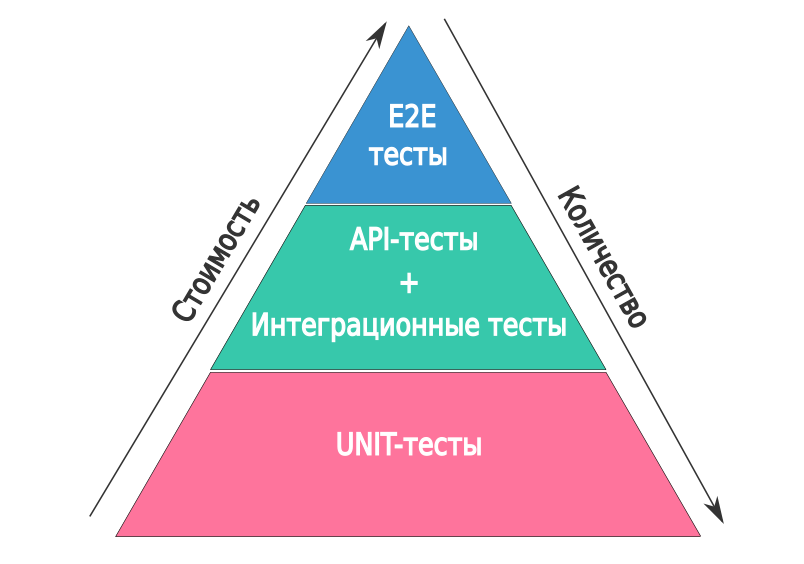

Пирамида – это концепция, которая говорит, что в проекте есть 3 вида тестирования:
- Unit, когда тестируется отдельная функция или модуль.
- Интеграционное, когда тестируются несколько модулей вместе.
- E2E, когда все приложение тестируется целиком, например, включая базу данных.

Модульное/компонентное тестирование (unit testing) - процесс в программировании, позволяющий проверить на корректность отдельные модули (в общем сысле слова, не стоит путать с модулями python) исходного кода программы. Идея состоит в том, чтобы писать тесты для каждой нетривиальной функции или метода. Это позволяет достаточно быстро проверить, не привело ли очередное изменение кода к появлению ошибок в уже оттестированных местах программы, а также облегчает обнаружение и устранение таких ошибок. Ожидается что модульные тесты должны занимать 70-80% от общего числа тестов.

Интеграционные тесты должны занимать 10-15% 

E2E тесты - 5%

Также некоторые источники выделяют ручные тесты - они должны быть единичными. К ним, в частности, относится DryRun концепция или "пробный запуск" 





Рассмотрим основные возможности на примере класса Circle:

In [ ]:
%%file circle.py

import math


class Circle:
    def __init__(self, radius):
        self._radius = radius
        
    @property
    def area(self):
        return 2 * self.radius * math.pi
        
    @property
    def radius(self):
        return self._radius
    
    @radius.setter
    def radius(self, radius):
        self._radius = radius

    @radius.deleter
    def radius(self):
        del self._radius
        
    @property
    def diameter(self):
        return self.radius * 2
    
    @diameter.setter
    def diameter(self, diameter):
        self._radius = diameter / 2 

## doctest

https://docs.python.org/3/library/doctest.html

Стандартный модуль python, позволяющий поддерживать простые интерактивные тесты

Цели:

- проверить актуальность строк документации, убедившись, что все интерактивные примеры работают именно так, как задокументировано.
- написать руководство для пакета, иллюстрированное примерами ввода-вывода. В зависимости от того, на что обращается внимание - на примеры или на пояснительный текст, это можно назвать либо “литературным тестированием”, либо “исполняемой документацией”.


In [ ]:
import math

class Circle:
    def __init__(self, radius):
        self._radius = radius
        
    @property
    def area(self):
        """
        >>> round(Circle(5).area, 4)
        31.4159
        >>> Circle(0).area
        0.0
        """
        return 2 * self.radius * math.pi
        
    @property
    def radius(self):
        return self._radius
    
    @radius.setter
    def radius(self, radius):
        self._radius = radius

    @radius.deleter
    def radius(self):
        del self._radius
        
    @property
    def diameter(self):
        """
        >>> Circle(5).diameter
        10
        >>> Circle(0).diameter
        0
        """
        return self.radius * 2
    
    @diameter.setter
    def diameter(self, diameter):
        self._radius = diameter / 2 
        
import doctest
doctest.testmod()

## unittest

https://docs.python.org/3/library/unittest.html

Библиотека встроена в стандартную поставку python

In [ ]:
import unittest
import sys

from circle import Circle

class TestCircle(unittest.TestCase):
    
    def setUp(self):
        self.circle = Circle(2)
    
    def test_diameter(self):
        self.assertEqual(self.circle.diameter, 4)
        
    def test_area(self):
        self.assertEqual(self.circle.area, 4 * math.pi)
        
    @unittest.skipIf(sys.version_info.minor < 12, 'Этот тесть будет работать только на версии python >= 3.12')
    def test_spec_3_12(self):
        pass
    
    def test_no_radius(self):
        del self.circle.radius
        with self.assertRaises(AttributeError):
            self.circle.diameter
        

unittest.main(argv=[''], verbosity=2, exit=False)

`setUp()` и `tearDown()` – это стандартные методы, которые поставляются с фреймворком unittest (они определены в классе `unittest.TestCase`). Эти методы позволяют установить некоторое тестовое окружение для каждого теста

`assert*()` - методы утверждения, которые несут полезную нагрузку тестирования

Также библиотека содержит большое количество полезных декораторов для настройки тестов, например `@skipIf`, `@skip` 

## pytest

Самый популярный фремворк для написания тестов на python и, возможно, самый мощный фреймворк с открытым исхлдным кодом

Pytest позволяет провести модульное тестирование, функциональное тестирование  (тестирование способности кода удовлетворять бизнес-требования), тестирование API (application programming interface) и многое другое

Написание тестов здесь намного проще, нежели в unittest. Вам нужно просто написать несколько функций, удовлетворяющих следующим условиям:
- Название функции должно начинаться с ключевого слова test;
- Внутри функции должно проверяться логическое выражение при помощи оператора  `assert`.


In [ ]:
pip install pytest

In [ ]:
%%file test_pytest.py

import pytest
from unittest.mock import MagicMock, patch

from circle import Circle
import math

class TestCircle:
    def setup(self):
        self.circle = Circle(2)
        
    def test_diameter(self):
       assert self.circle.diameter == 4

    def test_area(self):
       assert self.circle.area == 4 * math.pi

    def test_no_radius(self):
       del self.circle.radius
       with pytest.raises(AttributeError):
            self.circle.diameter
            
    # parametrize - реализация паттерна тестирования data provider
    @pytest.mark.parametrize('radius, result', [(2, 4), (3, 6), (10, 20)], ids=['r=2', 'r=3', 'r=10'])
    def test_diameter_parametrized(self, radius, result):
        circle = Circle(radius)
        assert circle.diameter == result
        
    # можно подменять объекты на моки - своеобразные заглушки
    # моки очень полезны если есть какие-либо нестабильные зависимости, например сеть
    @patch('circle.Circle.area', property(MagicMock(return_value=1)))
    def test_diameter_mocked(self):
        circle = Circle(10)
        assert circle.area == 1
        
    # monkeypatch - фикстура - заранее подготовленное состояние окружения тестирования, 
    # требуемое для гарантии повторяемости процесса
    def test_diameter_monkypatched(self, monkeypatch):
        @property
        def mockreturn(self):
            return 2
        
        monkeypatch.setattr(Circle, 'area', mockreturn)
        circle = Circle(10)
        assert circle.area == 2  


In [ ]:
!python -m pytest test_pytest.py

In [ ]:
!pip install pytest-cov


## Организация тестов

Для тестов в python создаётся отдельный пакет, имена тестов и путь к ним повторяют структуру основного проекта

Пример:
```
./project
    \_ Dockerfile
    \_ lib
        \_ clients
            \_ image_downloader.py
            \_ archive.py
        \_ resources
            \_ ...
    \_ tests
        \_ test_unit
            \_ test_clients
                \_ test_image_downloader.py
                \_ test_archive.py
            \_ test_resources
                \_ ...
        \_ test_service
        ...
```


## Профилирование

Профилирование - сбор характеристик работы программы, таких как время выполнения отдельных фрагментов (обычно подпрограмм), число верно предсказанных условных переходов, число кэш-промахов и т. д. Инструмент, используемый для анализа работы, называют профилировщиком или профайлером (англ. profiler). Обычно выполняется совместно с оптимизацией программы. 

Помним что преждевременная оптимизация и гипероптимизация - антипаттерны! Лучшее - враг хорошего

## cProfile

cProfile и profile обеспечивают детерминированное профилирование программ на Python.

Детерминированное профилирование предназначено для отражения того факта, что отслеживаются все события вызова функци, возврата функции и исключения, и устанавливаются точные тайминги для интервалов между этими событиями (в течение которых выполняется код пользователя). Напротив, статистическое профилирование случайным образом выбирает эффективный указатель инструкции и определяет, на что тратится время. Последний метод традиционно требует меньших накладных расходов, но предоставляет только относительные указания на то, где тратится время.

In [ ]:
!python -m cProfile -s time dd.py

## A-B тесты